In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [11]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

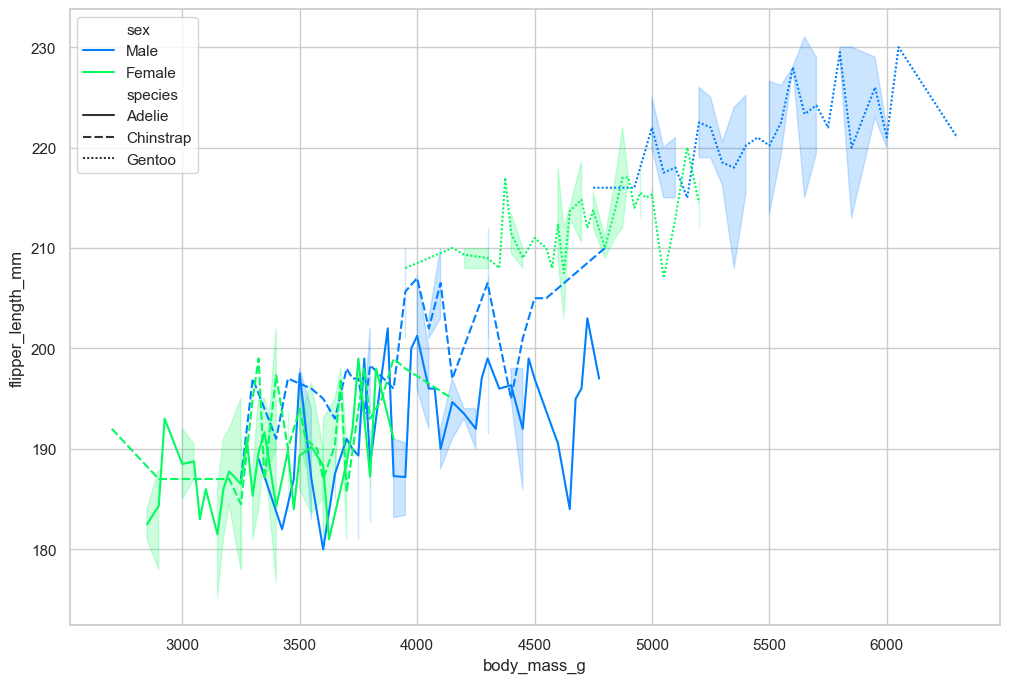

In [12]:
sns.set_theme(style="whitegrid", palette="gist_ncar", rc={'figure.figsize':(12, 8)})

# Load an example dataset with long-form data
dataset = sns.load_dataset("penguins")
# Plot the responses for different events and regions
sns.lineplot(x="body_mass_g", y="flipper_length_mm",
             hue="sex", style="species",
             data=dataset)

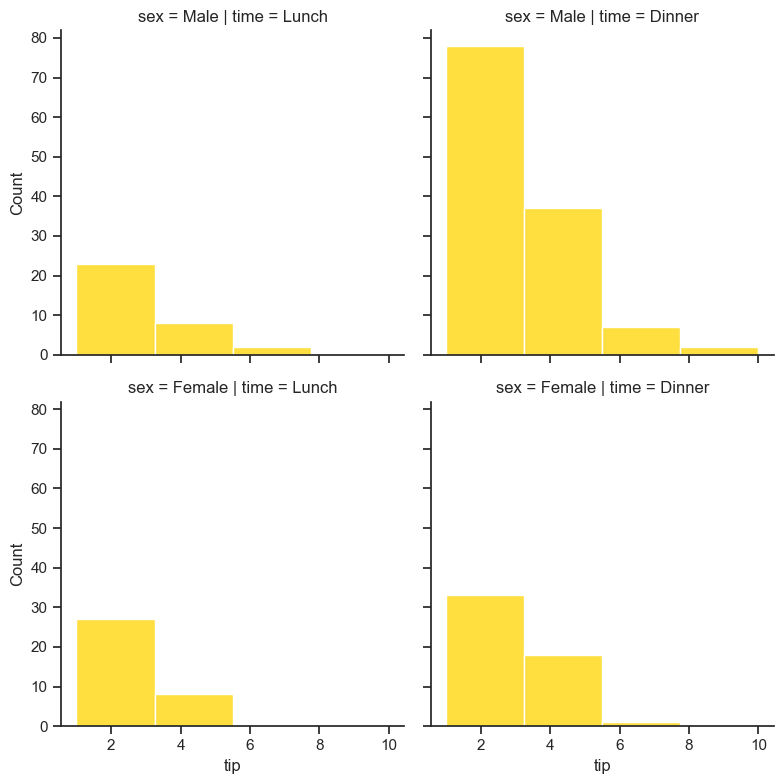

In [13]:
sns.set_theme(style="ticks", palette="hsv", rc={'figure.figsize':(8, 8)})
dataset = sns.load_dataset("tips")
sns.displot(
    dataset, x="tip", col="time", row="sex",
    binwidth=2, height=4, facet_kws=dict(margin_titles=False),
)

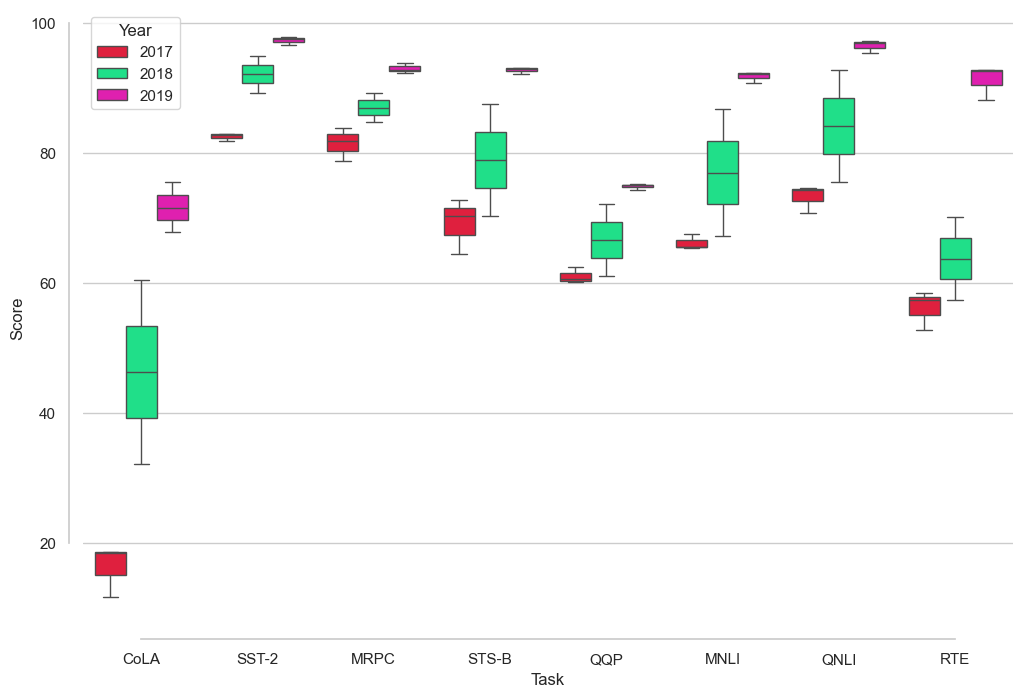

In [14]:
sns.set_theme(style="whitegrid", rc={'figure.figsize':(12, 8)})
dataset = sns.load_dataset("glue")

sns.boxplot(x="Task", y="Score",
            hue="Year", palette="gist_rainbow",
            data=dataset)
sns.despine(offset=10, trim=True)

<Axes: xlabel='time', ylabel='pulse'>

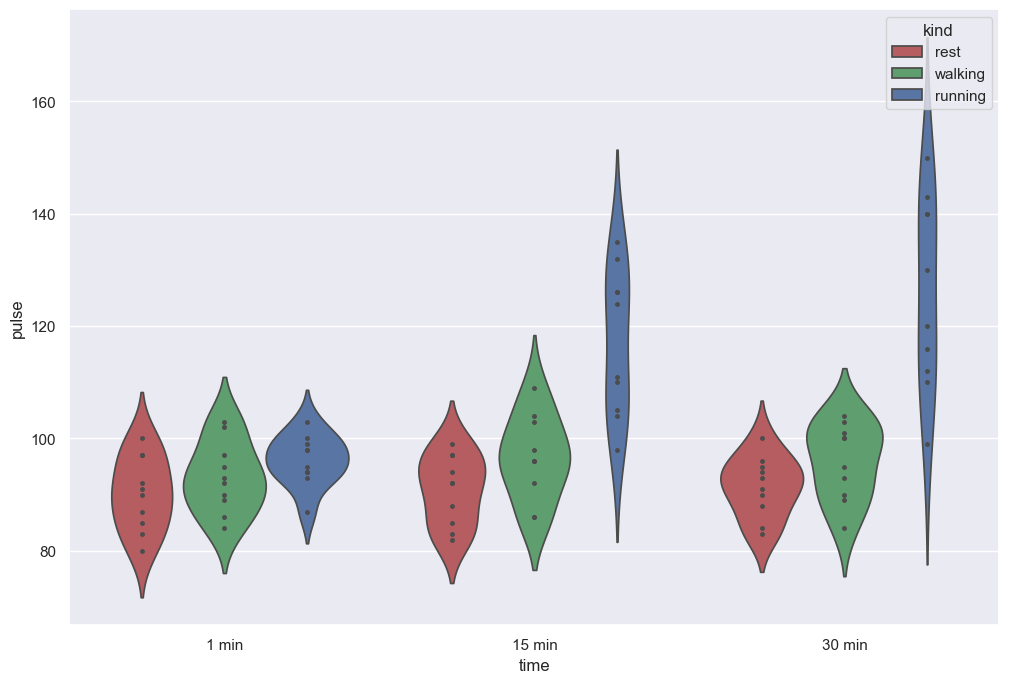

In [15]:
sns.set_theme(style="darkgrid")
dataset = sns.load_dataset("exercise")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=dataset, x="time", y="pulse", hue="kind",
               split=False, inner="point", fill=True,
               palette={"rest": "r", "walking": "g", "running": "b"})

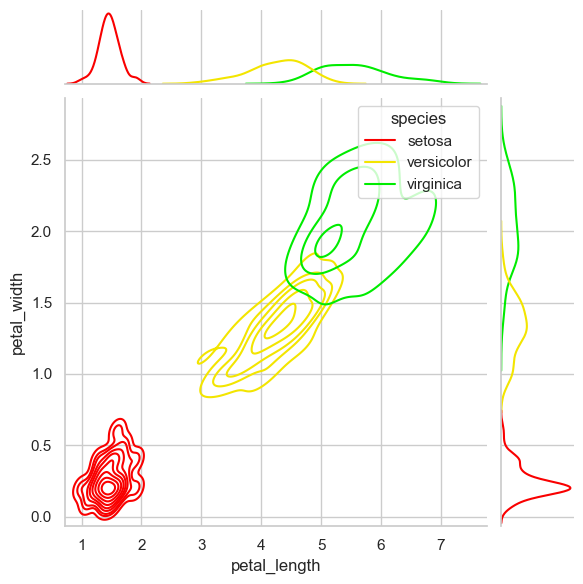

In [16]:
sns.set_theme(style="whitegrid", palette="nipy_spectral_r", rc={'figure.figsize':(10, 10)})
dataset = sns.load_dataset("iris")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=dataset,
    x="petal_length", y="petal_width", hue="species",
    kind="kde",
)

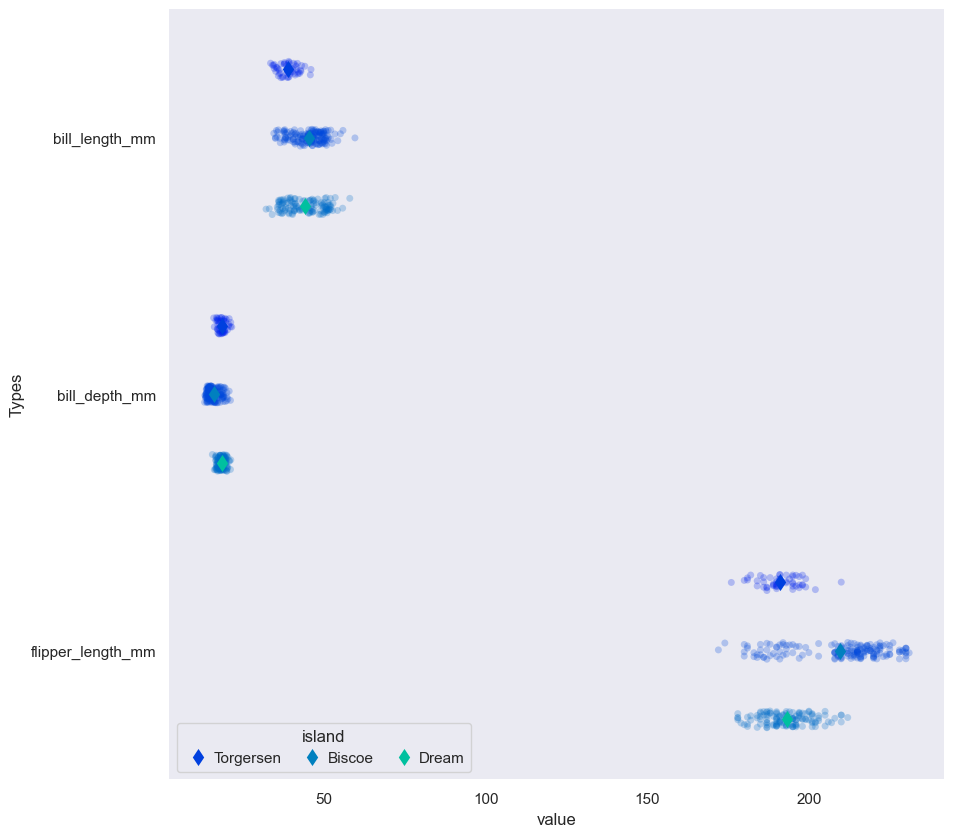

In [17]:
sns.set_theme(style="dark", palette="winter")
dataset = sns.load_dataset("penguins")
dataset.drop(['species', 'sex', 'body_mass_g'], inplace=True, axis=1)

# "Melt" the dataset to "long-form" or "tidy" representation
dataset = dataset.melt(id_vars="island", var_name="Types")

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(
    data=dataset, x="value", y="Types", hue="island",
    dodge=True, alpha=.25, zorder=1, legend=False,
)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(
    data=dataset, x="value", y="Types", hue="island",
    dodge=.8 - .8 / 3, palette="winter", errorbar=None,
    markers="d", markersize=6, linestyle="none",
)

# Improve the legend
sns.move_legend(
    ax, loc="lower left", ncol=3, frameon=True, columnspacing=1, handletextpad=0,
)

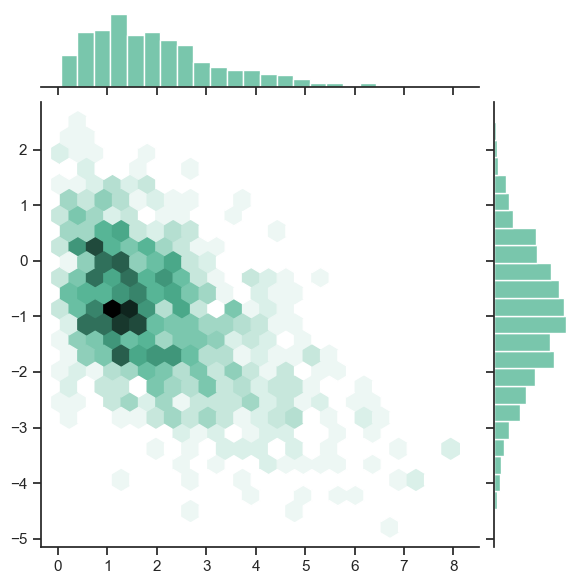

In [61]:
import numpy as np
import seaborn as sns
sns.set_theme(style="ticks")

rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")

Text(0.5, 0.98, 'Hexbin plot')

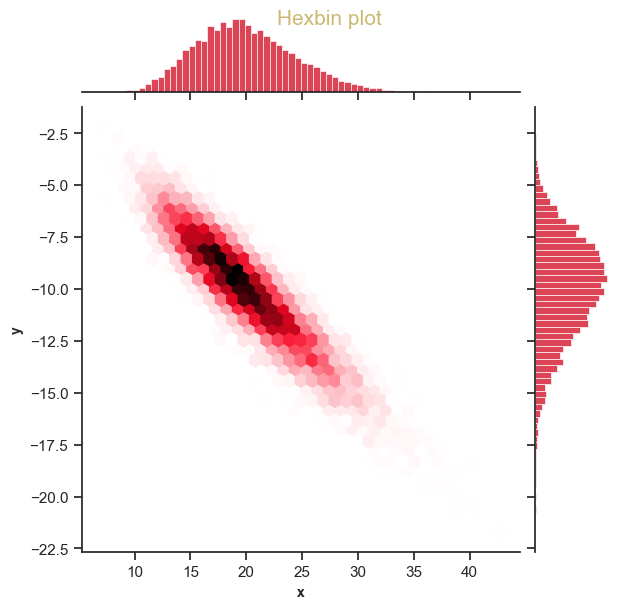

In [71]:
sns.set_theme(style="ticks")

rs = np.random.RandomState(2137)
x = rs.gamma(20, size=10000)
y = -.5 * x + rs.normal(size=10000)

g = sns.jointplot(x=x, y=y, kind="hex", color="#d1061e", gridsize=35)

g.set_axis_labels('x', 'y', fontsize=10, fontweight='bold')
g.fig.suptitle('Hexbin plot', fontsize=15, color='y')

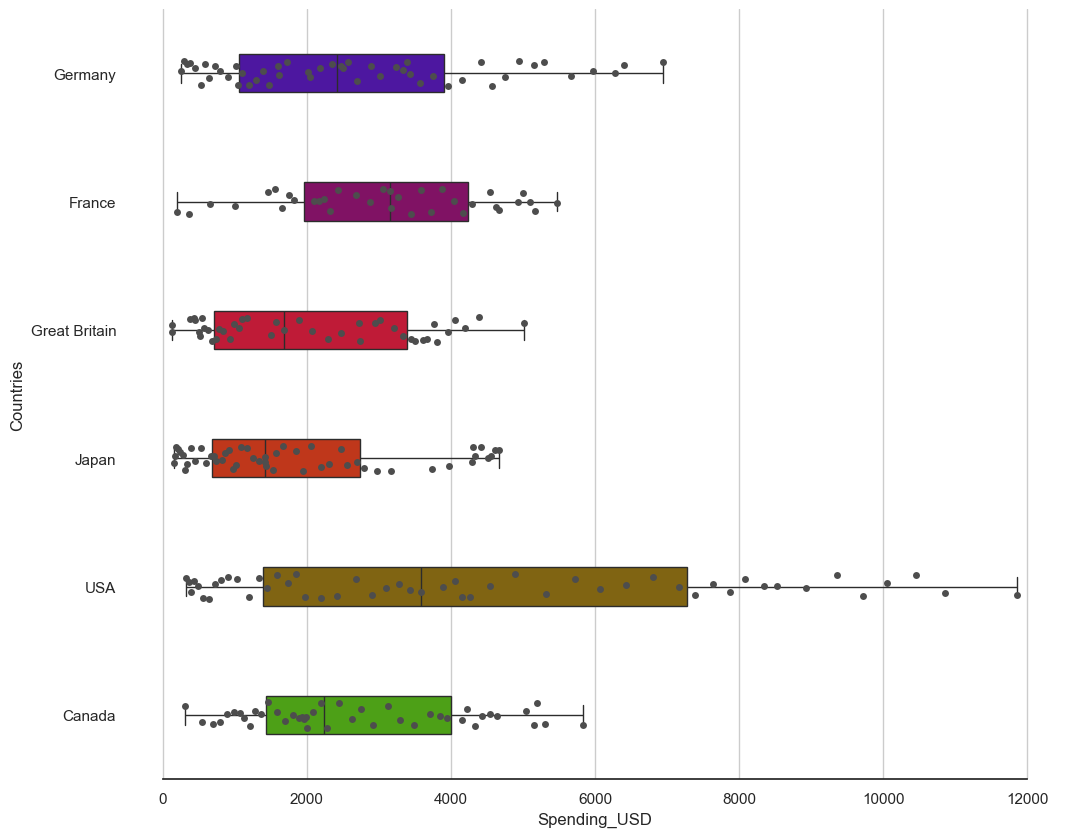

In [125]:
sns.set_theme(style="white")

f, ax = plt.subplots(figsize=(12, 10))

dataset = sns.load_dataset("healthexp")

sns.boxplot(
    dataset, x="Spending_USD", y="Country", hue="Country",
    whis=[0, 100], width=.3, palette="brg"
)

sns.stripplot(dataset, x="Spending_USD", y="Country", size=5, color=".3")

ax.xaxis.grid(True)
ax.set(ylabel="Countries")
sns.despine(trim=True, left=True)